# Convulated Neural Network
Applying deep learning for classification

Using TensorFlow and Keras ( from TensorFlow 2.0 Package )


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
#import keras
import tensorflow.keras as keras
from tensorflow.keras import backend

In [0]:
trainPath = 'intel-image-classification/seg_train/'
testPath = 'intel-image-classification/seg_test/'
predPath = 'intel-image-classification/seg_pred/'

In [0]:
#Checking the folder content (Train Folder)
for folder in  os.listdir(trainPath + 'seg_train') : 
    files = gb.glob(pathname= str( trainPath +'seg_train//' + folder + '/*.jpg'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 2404 in folder glacier
For training data , found 2271 in folder forest
For training data , found 2274 in folder sea
For training data , found 2382 in folder street
For training data , found 2512 in folder mountain
For training data , found 2191 in folder buildings


In [0]:
#Checking the folder content for Test Folder
for folder in  os.listdir(testPath +'seg_test') : 
    files = gb.glob(pathname= str( testPath +'seg_test//' + folder + '/*.jpg'))
    print(f'For testing data , found {len(files)} in folder {folder}')

For testing data , found 553 in folder glacier
For testing data , found 474 in folder forest
For testing data , found 510 in folder sea
For testing data , found 501 in folder street
For testing data , found 525 in folder mountain
For testing data , found 437 in folder buildings
For testing data , found 0 in folder .DS_Store


In [0]:
#Prediction Folder
files = gb.glob(pathname= str(predPath +'seg_pred/*.jpg'))
print(f'For Prediction data , found {len(files)}')

For Prediction data , found 7301


In [0]:
#Checking the images

code = {'buildings':0 ,'forest':1,'glacier':2,'mountain':3,'sea':4,'street':5}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x    

In [0]:
#Checking the size of the images
def checkSize(tP,folder):
    size = []
    for folder1 in  os.listdir(tP +folder) : 
        files = gb.glob(pathname= str( tP +folder +'//' + folder1 + '/*.jpg'))
        for file in files: 
            image = plt.imread(file)
            size.append(image.shape)
    return pd.Series(size).value_counts()

In [0]:
#checking the size of trainFolder
checkSize(trainPath,'seg_train')

(150, 150, 3)    13986
(113, 150, 3)        7
(135, 150, 3)        3
(111, 150, 3)        3
(123, 150, 3)        2
(142, 150, 3)        2
(144, 150, 3)        2
(108, 150, 3)        2
(134, 150, 3)        2
(146, 150, 3)        2
(143, 150, 3)        2
(136, 150, 3)        2
(119, 150, 3)        1
(133, 150, 3)        1
(100, 150, 3)        1
(140, 150, 3)        1
(131, 150, 3)        1
(149, 150, 3)        1
(105, 150, 3)        1
(141, 150, 3)        1
(115, 150, 3)        1
(76, 150, 3)         1
(110, 150, 3)        1
(120, 150, 3)        1
(147, 150, 3)        1
(102, 150, 3)        1
(103, 150, 3)        1
(145, 150, 3)        1
(81, 150, 3)         1
(124, 150, 3)        1
(97, 150, 3)         1
dtype: int64

In [0]:
#Checking the size of testFolder
checkSize(testPath,'seg_test')

(150, 150, 3)    2993
(72, 150, 3)        1
(110, 150, 3)       1
(76, 150, 3)        1
(141, 150, 3)       1
(81, 150, 3)        1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [0]:
size = []
files = gb.glob(pathname= str(predPath +'seg_pred/*.jpg'))
for file in files: 
    image = plt.imread(file)
    size.append(image.shape)
pd.Series(size).value_counts()

(150, 150, 3)    7288
(100, 150, 3)       1
(124, 150, 3)       1
(133, 150, 3)       1
(139, 150, 3)       1
(112, 150, 3)       1
(129, 150, 3)       1
(374, 500, 3)       1
(144, 150, 3)       1
(108, 150, 3)       1
(126, 150, 3)       1
(143, 150, 3)       1
(149, 150, 3)       1
(131, 150, 3)       1
dtype: int64

In [0]:
#Reading the images
#size = 100 , so it will be suitable amount to contain accuracy without losing so much time in training
s = 100
Xtrain = []
ytrain = []
for folder in  os.listdir(trainPath +'seg_train') : 
    files = gb.glob(pathname= str( trainPath +'seg_train//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        Xtrain.append(list(image_array))
        ytrain.append(code[folder])

In [0]:
#Items in training dataset
print(f'we have {len(Xtrain)} items in X-train')

we have 14034 items in X-train


In [0]:
#function to plot the images in the folder
def plotImages(arr):
    plt.figure(figsize=(20,20))
    for n , i in enumerate(list(np.random.randint(0,len(arr),36))) : 
        plt.subplot(6,6,n+1)
        plt.imshow(arr[i])   
        plt.axis('off')
        plt.title(getcode(arr[i]))
        


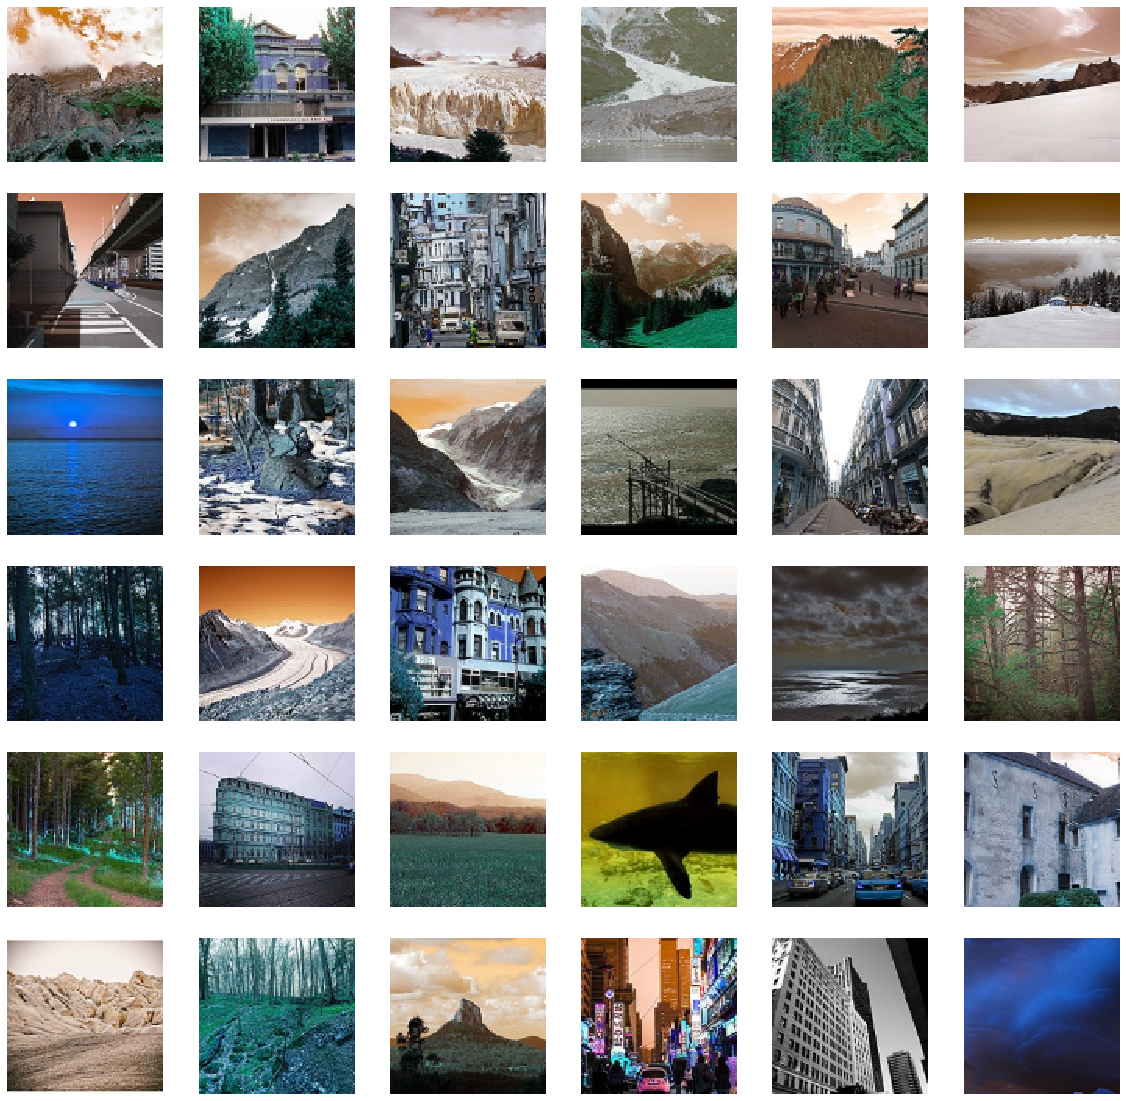

In [0]:
#we have have a look to random pictures in X_train , and to adjust their title using the y value

plotImages(Xtrain)

In [0]:
Xtest = []
ytest = []
for folder in  os.listdir(testPath +'seg_test') : 
    files = gb.glob(pathname= str(testPath + 'seg_test//' + folder + '/*.jpg'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (s,s))
        Xtest.append(list(image_array))
        ytest.append(code[folder])
        

In [0]:
#Items in testing dataset
print(f'we have {len(Xtest)} items in X-Test')

we have 3000 items in X-Test


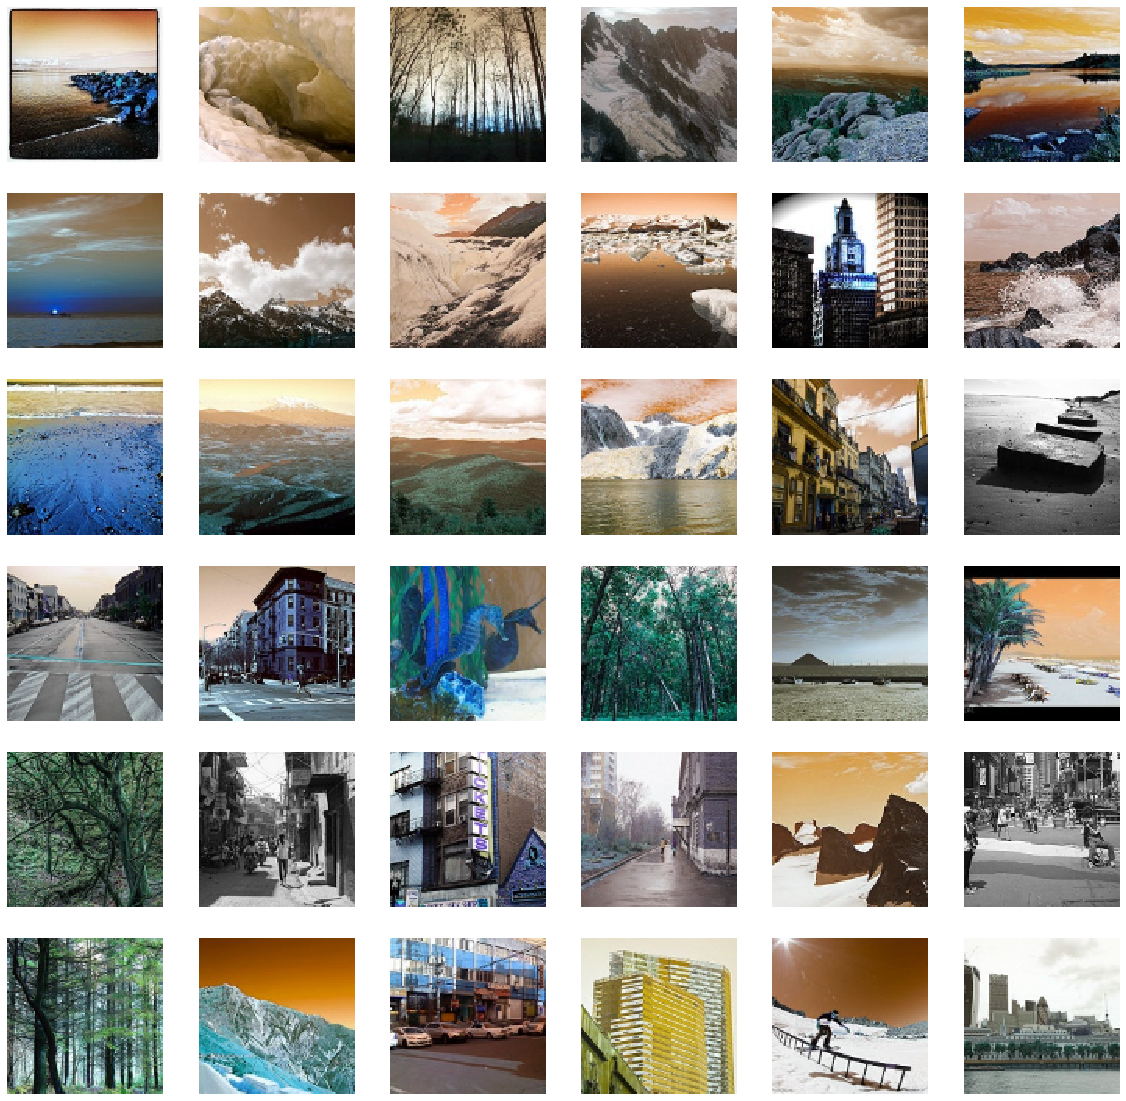

In [0]:
#Images in Xtest
plotImages(Xtest)

In [0]:
#with Prediction data , without having title ofcourse
Xpred = []
files = gb.glob(pathname= str(predPath + 'seg_pred/*.jpg'))
for file in files: 
    image = cv2.imread(file)
    image_array = cv2.resize(image , (s,s))
    Xpred.append(list(image_array))

In [0]:
print(f'we have {len(Xpred)} items in X-pred')

we have 7301 items in X-pred


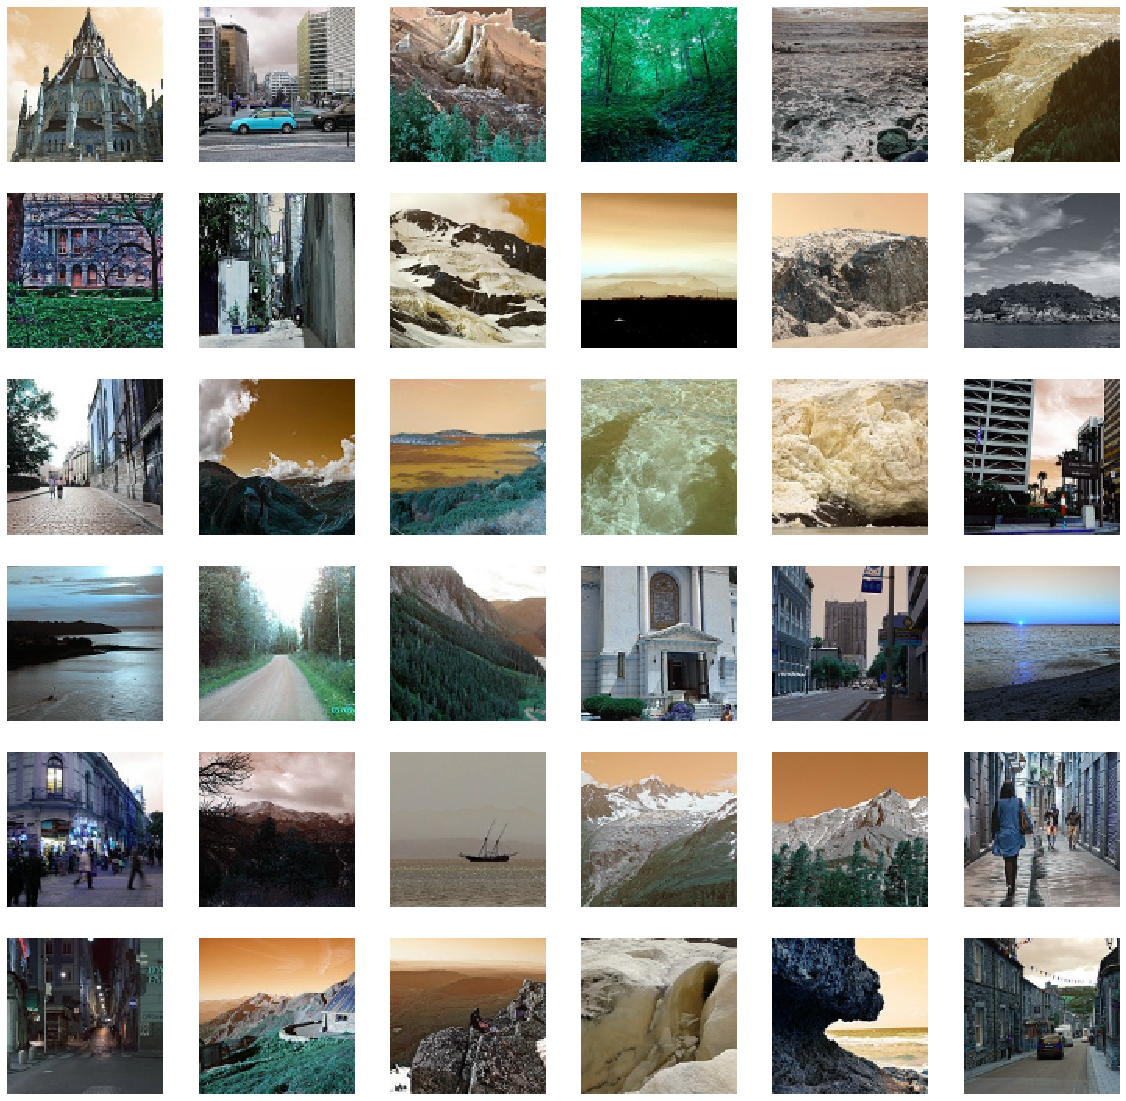

In [0]:
#images in Xpred 
plotImages(Xpred)

In [0]:
#The model
#first to convert the data into arrays using numpy


Xtrain = np.array(Xtrain)
Xtest = np.array(Xtest)
XpredArray = np.array(Xpred)
ytrain = np.array(ytrain)
ytest = np.array(ytest)

print(f'Xtrain shape  is {Xtrain.shape}')
print(f'Xtest shape  is {Xtest.shape}')
print(f'Xpred shape  is {XpredArray.shape}')
print(f'ytrain shape  is {ytrain.shape}')
print(f'ytest shape  is {ytest.shape}')

Xtrain shape  is (14034, 100, 100, 3)
Xtest shape  is (3000, 100, 100, 3)
Xpred shape  is (7301, 100, 100, 3)
ytrain shape  is (14034,)
ytest shape  is (3000,)


Sequential Model
In Keras, we assemble layers to build models. A model is usually a graph of layers. The most common type of model is a stack of layers: the tf.keras.Sequential model.

Layers ( Used in the model )

Dense: Dense implements the operation: output = activation(dot(input, kernel) + bias) where activation is the element-wise activation function passed as the activation argument, kernel is a weights matrix created by the layer, and bias is a bias vector created by the layer (only applicable if use_bias is True).

Conv2D: This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs. If use_bias = True, a bias vector is created and added to the outputs. Finally, if activation is not none, it is then applied to the outputs as well.This layer provides the convulation of the image passed in the model. The pointer moves from edge to edge for the image.

Dropout: Dropout layer (mainly used to prevent overfitting) consists in randomly setting a fraction rate of input units to 0 at each update during training time, which helps prevent overfitting.

MaxPool2D: It provides Maximum pooling operation for spatial data.

Flatten: It flattens the input. Does not affect the batch size.

Activation

relu : Rectified Linear Unit: It is a piece-wise activation function which will output the input directly if it is positive else will return the zero

softmax : Softmax activation function

In [0]:

KerasModel = keras.models.Sequential([
        keras.layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(s,s,3)),
        keras.layers.Conv2D(150,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Conv2D(120,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(80,kernel_size=(3,3),activation='relu'),    
        keras.layers.Conv2D(50,kernel_size=(3,3),activation='relu'),
        keras.layers.MaxPool2D(4,4),
        keras.layers.Flatten() ,    
        keras.layers.Dense(120,activation='relu') ,    
        keras.layers.Dense(100,activation='relu') ,    
        keras.layers.Dense(50,activation='relu') ,        
        keras.layers.Dropout(rate=0.5) ,            
        keras.layers.Dense(6,activation='softmax') ,    
        ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
#Compiling the model using adam optimizer & sparse categorical crossentropy loss

KerasModel.compile(optimizer ='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [0]:
#Model DEtails
print('Model Details are : ')
print(KerasModel.summary())

Model Details are : 
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 150)       270150    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 150)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 120)       162120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 20, 20, 80)        86480     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 18, 18, 50)        36050     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None,

In [0]:
#Training the model using 50 epochs

e = 50
ThisModel = KerasModel.fit(Xtrain, ytrain, epochs=e,batch_size=128,verbose=1)

Train on 14034 samples
Epoch 1/50
14034/14034 [==============================] - 108s 8ms/sample - loss: 1.8630 - acc: 0.3194
Epoch 2/50
14034/14034 [==============================] - 95s 7ms/sample - loss: 1.1887 - acc: 0.5165
Epoch 3/50
14034/14034 [==============================] - 95s 7ms/sample - loss: 1.0499 - acc: 0.5778
Epoch 4/50
14034/14034 [==============================] - 95s 7ms/sample - loss: 0.9530 - acc: 0.6278
Epoch 5/50
14034/14034 [==============================] - 95s 7ms/sample - loss: 0.8648 - acc: 0.6749
Epoch 6/50
14034/14034 [==============================] - 95s 7ms/sample - loss: 0.7893 - acc: 0.7180
Epoch 7/50
14034/14034 [==============================] - 95s 7ms/sample - loss: 0.7360 - acc: 0.7434
Epoch 8/50
14034/14034 [==============================] - 95s 7ms/sample - loss: 0.6648 - acc: 0.7775
Epoch 9/50
14034/14034 [==============================] - 95s 7ms/sample - loss: 0.6128 - acc: 0.7958
Epoch 10/50
14034/14034 [==============================] -

In [0]:
#Model Evaluation ( Accuracy )

ModelLoss, ModelAccuracy = KerasModel.evaluate(Xtest, ytest)

print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

3000/3000 [==============================] - 8s 3ms/sample - loss: 1.4270 - acc: 0.8097
Test Loss is 1.4269843373585802
Test Accuracy is 0.8096666932106018


In [0]:
#Predicting using Keras

yPred = KerasModel.predict(Xtest)

print('Prediction Shape is {}'.format(yPred.shape))

Prediction Shape is (3000, 6)


In [0]:
yResult = KerasModel.predict(XpredArray)

print('Prediction Shape is {}'.format(yResult.shape))

Prediction Shape is (7301, 6)


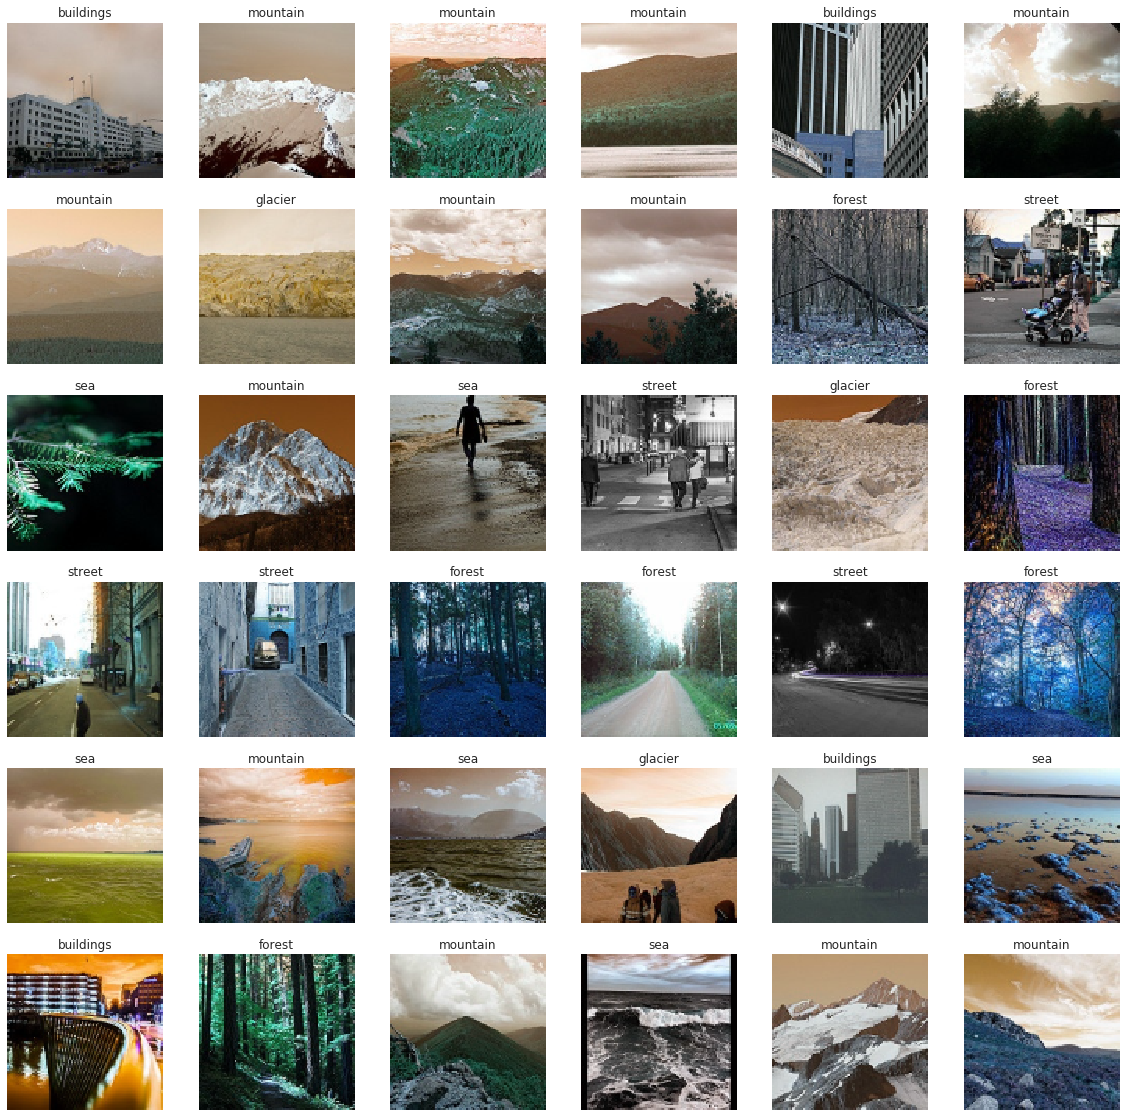

In [0]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(Xpred),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(Xpred[i])    
    plt.axis('off')
    plt.title(getcode(np.argmax(yResult[i])))